# WeatherPy
----

#### Note
*  Open issues: 
1) how to move the y intercept value around on the plot for northern hemi citys
2) how to get the y intercept to display for the souther hemi plots
3) add observations to each plot
4) get data for two addtional days

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

73ceaec8da4e2e6bacfe71e5777e5c6f


## Generate Cities List

In [196]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [197]:
#API Call
#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#test data used to for initial runs of the loop
#cities = ["Paris", "London", "Oslo", "Beijing", "Jokie Dokie", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
lng = []
temp_max = []
city_2 = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
date = []
count = 0
set_number = 1


response = requests.get(query_url + city).json() 

import pprint
#pprint.pprint(response)

#Loop through the list of cities and perform a request for data on each
print(f'Beginning Data Retrieval')
print(f'---------------------------')

                        
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        
        if count >= 50: 
            count = 1
            set_number =set_number + 1
            city_2.append(city)
        else:
            count += 1
            city_2.append(city)
           
        print(f'Processing Record {count} of Set {set_number} | {city}')  
    
    except KeyError:
        print(f'City Not Found...Skipping...')
    
print(f'---------------------------')
print(f'End of Data Retrieval')
print(f'---------------------------')

  
    

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | oktyabrskiy
City Not Found...Skipping...
Processing Record 8 of Set 1 | maniitsoq
Processing Record 9 of Set 1 | shangzhi
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | grand gaube
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | victoria
Processing Record 18 of Set 1 | zolochiv
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | huilong
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | malanje
Processing Record 23 o

Processing Record 39 of Set 4 | lodja
Processing Record 40 of Set 4 | talnakh
Processing Record 41 of Set 4 | hualmay
Processing Record 42 of Set 4 | oregon
Processing Record 43 of Set 4 | kolda
Processing Record 44 of Set 4 | ballina
Processing Record 45 of Set 4 | altay
Processing Record 46 of Set 4 | puerto narino
Processing Record 47 of Set 4 | vaghashen
Processing Record 48 of Set 4 | comodoro rivadavia
Processing Record 49 of Set 4 | hadejia
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | mitsamiouli
Processing Record 2 of Set 5 | lagoa
Processing Record 3 of Set 5 | progreso
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | isla mujeres
City Not Found...Skipping...
Processing Record 7 of Set 5 | buala
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of Set 5 | hanzhong
Processing Record 10 of Set 5 | hobyo
City Not Found...Skipping...
Processing Record 11 of Set 5 | yala
Processin

Processing Record 24 of Set 8 | alice springs
Processing Record 25 of Set 8 | axim
Processing Record 26 of Set 8 | monte alegre
Processing Record 27 of Set 8 | gigmoto
Processing Record 28 of Set 8 | ponta do sol
Processing Record 29 of Set 8 | doka
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | kungurtug
City Not Found...Skipping...
Processing Record 32 of Set 8 | guerrero negro
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | collie
Processing Record 35 of Set 8 | carballo
City Not Found...Skipping...
Processing Record 36 of Set 8 | fallon
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | itarema
Processing Record 39 of Set 8 | mandal
Processing Record 40 of Set 8 | bryan
Processing Record 41 of Set 8 | merrill
Processing Record 42 of Set 8 | baculin
Processing Record 43 of Set 8 | san andres
Processing Record 44 of Set 8 | price
Processing Record 45 of Set 8 | svetlaya
Processing Record 46 of Set 8 | liepaj

Processing Record 7 of Set 12 | kajiado
Processing Record 8 of Set 12 | mongoumba
Processing Record 9 of Set 12 | hammerfest
---------------------------
End of Data Retrieval
---------------------------


In [198]:
#put response data in to a dict

weather_dict = {
    'City': city_name,
    "Lat": lat,
    'Lng': lng,
    "Max Temp": temp_max,
"Humidity": humidity, 
'Cloudiness': cloudiness, 
'Wind Speed': wind_speed,
'Country': country,
'Date': date}

print(weather_dict)



Weather Dict
{'City': ['Rikitea', 'Vaini', 'Kapaa', 'Arraial do Cabo', 'Yellowknife', 'Busselton', "Oktyabr'skiy", 'Maniitsoq', 'Shangzhi', 'Albany', 'Grand Gaube', 'Cherskiy', 'Hilo', 'Bluff', 'Rio Grande', 'Lebu', 'Hong Kong', 'Zolochiv', 'Ribeira Grande', 'Huilong', 'Mataura', 'Malanje', 'Swanzey', 'Cap Malheureux', 'Tiksi', 'Bud', 'Cabedelo', 'Cidreira', 'Ushuaia', 'Meulaboh', 'Ozinki', 'George Town', 'Hermanus', 'Chapais', 'Port Keats', 'Kumul', 'Bengkulu', 'Khatanga', 'Saint George', 'Tuktoyaktuk', 'Iqaluit', 'Hambantota', 'Tasiilaq', 'Tuatapere', 'Puerto Ayora', 'Saint-Philippe', 'Tadine', 'Narsaq', 'Guápiles', 'Hobart', 'Ust-Tsilma', 'Punta Arenas', 'Tiznit Province', 'Chokurdakh', 'Bambous Virieux', 'Vyshestebliyevskaya', 'Saint Paul Harbor', 'Esperance', 'Camacha', 'Atuona', 'West Plains', 'Barrow', 'Thunder Bay', 'Dikson', 'Aquiraz', 'Portel', 'Cabo San Lucas', 'Soure', 'Saskylakh', 'Butaritari', 'Atar', 'Hithadhoo', 'Oranjemund', 'Chernyshevskiy', 'Carnarvon', 'Darovskoy', 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [215]:
#convert dict to a dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,23.22,76,61,7.55,PF,1604944827
1,Vaini,-21.20,-175.20,22.00,94,20,2.10,TO,1604944852
2,Kapaa,22.08,-159.32,26.00,78,20,8.20,US,1604944657
3,Arraial do Cabo,-22.97,-42.03,28.00,78,40,4.10,BR,1604944567
4,Yellowknife,62.46,-114.35,-2.22,79,75,1.50,CA,1604944642
...,...,...,...,...,...,...,...,...,...
554,Bongandanga,1.50,21.05,20.60,93,100,1.28,CD,1604944987
555,San Quintín,30.48,-115.95,16.68,51,66,5.46,MX,1604944987
556,Kajiado,-1.85,36.78,19.00,82,20,3.10,KE,1604944987
557,Mongoumba,3.64,18.59,23.54,87,93,1.24,CF,1604944988


In [216]:
#output to cvs
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [221]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,20.583542,14.585134,14.600948,72.787120,50.677996,3.784562,1.604945e+09
std,32.510344,88.960531,13.306481,19.078674,37.307115,2.672350,8.138665e+01
min,-54.800000,-179.170000,-32.390000,10.000000,0.000000,0.260000,1.604944e+09
25%,-4.955000,-59.965000,5.390000,62.500000,11.000000,1.790000,1.604945e+09
50%,24.690000,20.380000,18.450000,77.000000,56.000000,3.100000,1.604945e+09
75%,46.890000,90.645000,25.560000,87.000000,88.500000,5.115000,1.604945e+09
max,78.220000,179.320000,37.210000,100.000000,100.000000,18.210000,1.604945e+09


In [217]:
#  Get the indices of cities that have humidity over 100%.

too_humid = weather_df.loc[weather_df["Humidity"] >= 100, :]

#print(too_humid)

#put humid city index numbers into a list
too_humid.index

#print(humid_outliers)


Int64Index([57, 266, 330, 334, 392, 393, 396, 534, 538, 548, 558], dtype='int64')

In [220]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#drop rows by index
# index values were added in manually...can I make them a variable?

weather_clean_df = weather_df.drop([57, 266, 330, 334, 392, 393, 396, 534, 538, 548, 558])

weather_clean_df.count


<bound method DataFrame.count of                 City    Lat     Lng  Max Temp  Humidity  Cloudiness  \
0            Rikitea -23.12 -134.97     23.22        76          61   
1              Vaini -21.20 -175.20     22.00        94          20   
2              Kapaa  22.08 -159.32     26.00        78          20   
3    Arraial do Cabo -22.97  -42.03     28.00        78          40   
4        Yellowknife  62.46 -114.35     -2.22        79          75   
..               ...    ...     ...       ...       ...         ...   
553            Maţāy  28.42   30.78     21.84        57          88   
554      Bongandanga   1.50   21.05     20.60        93         100   
555      San Quintín  30.48 -115.95     16.68        51          66   
556          Kajiado  -1.85   36.78     19.00        82          20   
557        Mongoumba   3.64   18.59     23.54        87          93   

     Wind Speed Country        Date  
0          7.55      PF  1604944827  
1          2.10      TO  1604944852  


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

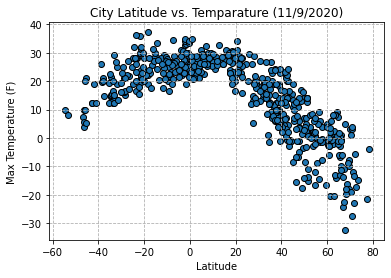

Plot is show low correlation between max temperatrue and a city's latitude.


In [336]:
#setup variables for plotting
city_lat = weather_clean_df["Lat"]
max_temp = weather_clean_df["Max Temp"]

#generate scatter plot
plt.title('City Latitude vs. Temparature (11/9/2020)')
plt.scatter(city_lat,max_temp,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Plot is show low correlation between max temperatrue and a city's latitude.")
#plt.savefig("output_data/fig1.png")

## Latitude vs. Humidity Plot

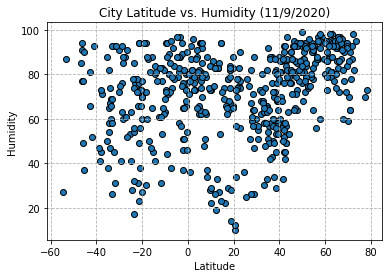

Plot is show low correlation between max temperatrue and a city's latitude.


In [335]:
#setup variables plotting
city_lat = weather_clean_df["Lat"]
humidity = weather_clean_df["Humidity"]

#generate scatter plot
plt.title('City Latitude vs. Humidity (11/9/2020)')
plt.scatter(city_lat,humidity,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Plot is show low correlation between max temperatrue and a city's latitude.")
#plt.savefig("output_data/fig1.png")

## Latitude vs. Cloudiness Plot

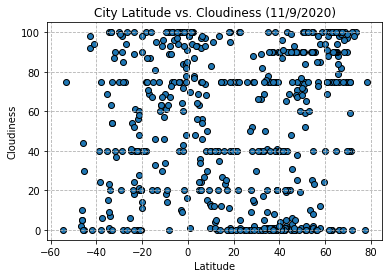

Plot is show low correlation between max temperatrue and a city's latitude.


In [334]:
#setup variables for plotting
city_lat = weather_clean_df["Lat"]
cloudiness = weather_clean_df["Cloudiness"]

#generate scatter plot
plt.title('City Latitude vs. Cloudiness (11/9/2020)')
plt.scatter(city_lat,cloudiness,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Plot is show low correlation between max temperatrue and a city's latitude.")
#plt.savefig("output_data/fig1.png")

## Latitude vs. Wind Speed Plot

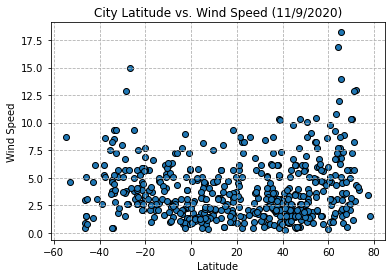

Plot is show low correlation between max temperatrue and a city's latitude.


In [333]:
#setup variables for plotting
city_lat = weather_clean_df["Lat"]
wind_speed = weather_clean_df["Wind Speed"]

#generate scatter plot
plt.title('City Latitude vs. Wind Speed (11/9/2020)')
plt.scatter(city_lat,wind_speed,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",linestyle="--", axis="both")
plt.show()
print(f"Plot is show low correlation between max temperatrue and a city's latitude.")
#plt.savefig("output_data/fig1.png")

## Linear Regression

In [287]:
#set up data and variables for plotting.  Northern hemisphere vs Southern city data.

#northern hemi cities
n_city_lat = weather_clean_df[weather_clean_df['Lat'] >= 0]


# #southern hemi cities
s_city_lat = weather_clean_df[weather_clean_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

          The r-squared is: 0.7233594801752927


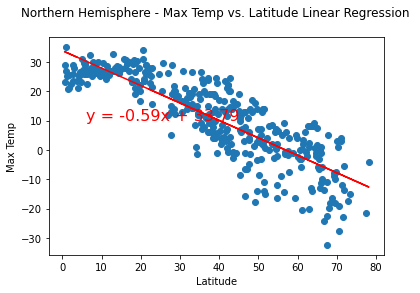

Plot is show low correlation between max temperatrue and a city's latitude.


In [312]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
max_temp = n_city_lat["Max Temp"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

#plt.savefig("output_data/fig1.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

          The r-squared is: 0.4235129611395677


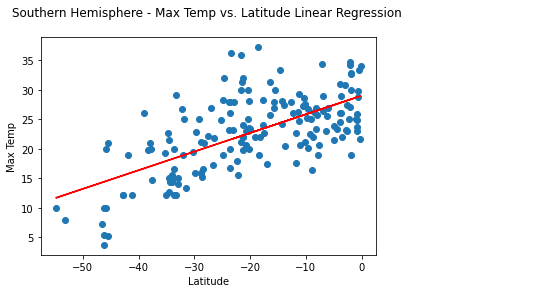

Plot is show low correlation between max temperatrue and a city's latitude.


In [321]:
#setup x and y variables for plotting

#southern hemi cities
city_lat = s_city_lat["Lat"]
max_temp = s_city_lat["Max Temp"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = max_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

#plt.savefig("output_data/fig1.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

          The r-squared is: 0.13889880331891732


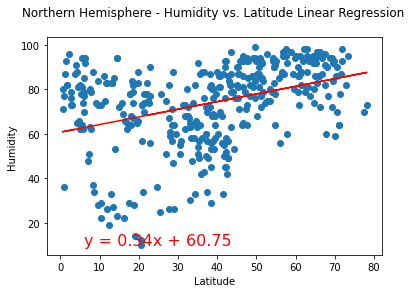

Plot is show low correlation between max temperatrue and a city's latitude.


In [326]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
humidity = n_city_lat["Humidity"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

#plt.savefig("output_data/fig1.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

          The r-squared is: 0.019497327193353852


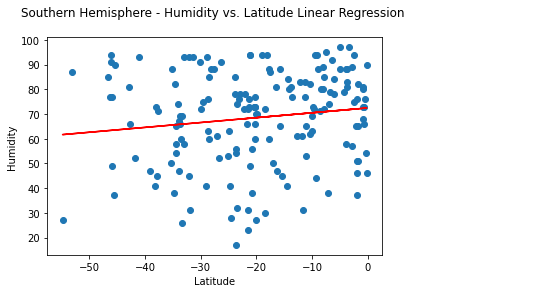

Plot is show low correlation between max temperatrue and a city's latitude.


In [327]:
#setup x and y variables for plotting

city_lat = s_city_lat["Lat"]
humidity = s_city_lat["Humidity"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

          The r-squared is: 0.04288546077953083


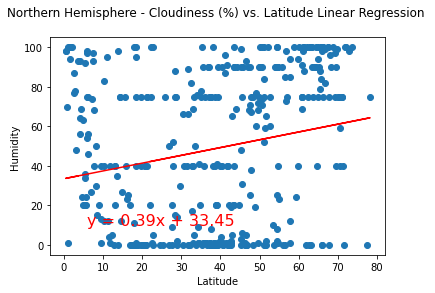

Plot is show low correlation between max temperatrue and a city's latitude.


In [329]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
cloudiness = n_city_lat["Cloudiness"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

#plt.savefig("output_data/fig1.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

          The r-squared is: 0.1184631248788908


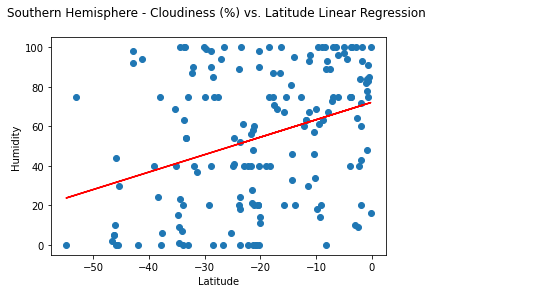

Plot is show low correlation between max temperatrue and a city's latitude.


In [330]:
#setup x and y variables for plotting

city_lat = s_city_lat["Lat"]
cloudiness = s_city_lat["Cloudiness"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

          The r-squared is: 0.06954012933577575


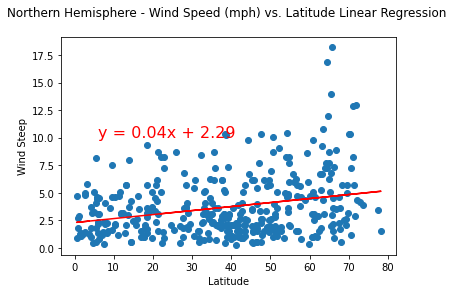

Plot is show low correlation between max temperatrue and a city's latitude.


In [331]:
#setup x and y variables for plotting

city_lat = n_city_lat["Lat"]
wind_speed = n_city_lat["Wind Speed"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Wind Steep')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")

#plt.savefig("output_data/fig1.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

          The r-squared is: 0.044899881837256156


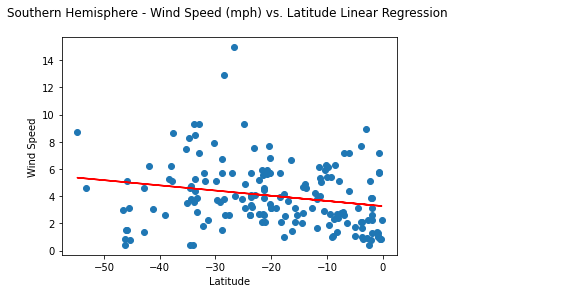

Plot is show low correlation between max temperatrue and a city's latitude.


In [332]:
#setup x and y variables for plotting

city_lat = s_city_lat["Lat"]
wind_speed = s_city_lat["Wind Speed"]


#calculate the correlation coefficent and linear regression model
x_values = city_lat
y_values = wind_speed

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
print(f"          The r-squared is: {rvalue**2}")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression \n')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"Plot is show low correlation between max temperatrue and a city's latitude.")